In [2]:
import matplotlib.pyplot as plt
import numpy as np
import re
import os

import importlib.util #import from superordinate folder
spec =importlib.util.spec_from_file_location("helper",str(re.search("(.*/)",os.getcwd()).groups(0)[0])+"helper.py")
helper = importlib.util.module_from_spec(spec)
spec.loader.exec_module(helper)

In [3]:
#Now you can zoom
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
import scipy.io
mat = scipy.io.loadmat('comps.mat')
ica_data = mat["comps"][0][0]
fsample = ica_data[0][0][0]
time = ica_data[1][0][0][0]#length of recording 
comps = ica_data[2][0][0]
#topo = ica_data[3]
#umixing = ica_data[4]
#label = ica_data[5]
#topolabel = ica_data[6]
#sampleinfo = ica_data[7]
#cfg = ica_data[8]

In [5]:
import pickle
with open('1d_movement.motion', "rb") as f:
    one_d = pickle.load(f)
    
exmot = one_d["RPS_C_13_C3_left_head"]

In [6]:
import matplotlib.pyplot as plt
from scipy import interpolate

def rescale(y, factor):
    """ Upscales by factor by means of linear interpolation"""
    factor += (1/len(y))*factor
    factor = 1/factor
    
    x = np.arange(0,len(y))
    f = interpolate.interp1d(x, y)

    xnew = np.arange(0, len(x)-1,factor)
    return f(xnew)

In [7]:
rescale(np.arange(1000),10).shape

(10000,)

In [8]:
#Cut according to video start trigger
vmrk = "DualEEG_RPS_C_13.vmrk"
idx = [not not re.search("128",x) for x in helper.parse_vmrk(vmrk)['description']].index(True)
time = int(helper.parse_vmrk(vmrk)['time'][idx])

new_comps = np.ndarray((comps.shape[0],comps.shape[1]-time))
for i in range(comps.shape[0]):
    new_comps[i] = comps[i][time:]
comps = new_comps

(-1, 10)

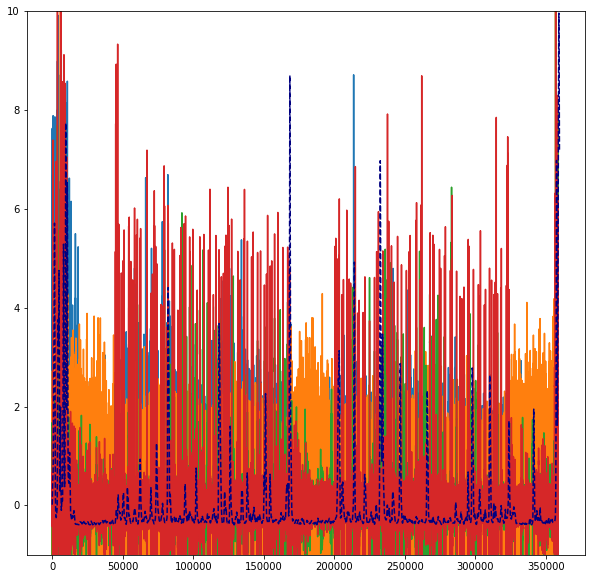

In [9]:
#Print first three components and head signal
fig,ax = plt.subplots(1,figsize=(10,10))

for comp in comps[:4]:
    ax.plot((comp-np.mean(comp))/np.std(comp))

exmot = rescale(one_d["RPS_C_13_C3_left_head"],20)
ax.plot((exmot-np.mean(exmot))/np.std(exmot), linestyle = "--", color = "navy")
ax.set_ylim(-1,10)

# Corrleation with the raw signal

In [10]:
# strip ends to ensure all have the same length
minsize = 99999999999999999999999
for comp in comps:
    size = comp.shape[0]
    if size < minsize:
        minsize = size
for mot in one_d.values():
    if len(mot)*20 < minsize:
        minsize = len(mot)*20
        
new_comps = np.ndarray((comps.shape[0],minsize))
for i in range(comps.shape[0]):
    new_comps[i] = comps[i][:minsize]
comps = new_comps

new_mot = {}
for k,v in one_d.items():
    new_mot[k] = rescale(v,20)[:minsize]
one_d = new_mot

In [11]:
from scipy import stats

In [35]:
#correlate movement signal with components
print("------------------------")
for comp in comps:
    _,_,r,p,_ =stats.linregress(comp, one_d["RPS_C_13_C3_left_hands"])
    print("{0:1.5f}".format(r),end = "  ")
    print("{0:1.5f}".format(p))
    
print("------------------------")
for comp in comps:
    _,_,r,p,_ =stats.linregress(comp, one_d["RPS_C_13_C3_left_head"])
    print("{0:1.5f}".format(r),end = "  ")
    print("{0:1.5f}".format(p))

print("------------------------")
for comp in comps:
    _,_,r,p,_ =stats.linregress(comp, one_d["RPS_C_13_C3_left_body"])
    print("{0:1.5f}".format(r),end = "  ")
    print("{0:1.5f}".format(p))

------------------------
0.00013  0.93991
-0.00010  0.95214
0.00057  0.73398
-0.00043  0.79963
0.00010  0.95264
-0.00006  0.97008
-0.00002  0.98866
0.00017  0.91698
-0.00007  0.96439
0.00007  0.96823
0.00002  0.99248
0.00002  0.98975
0.00005  0.97432
0.00014  0.93534
0.00020  0.90468
-0.00016  0.92624
0.00019  0.90912
-0.00002  0.99008
0.00049  0.77032
0.00059  0.72329
0.00028  0.86664
-0.00001  0.99449
-0.00001  0.99556
-0.00005  0.97653
-0.00001  0.99469
0.00013  0.93855
-0.00040  0.81179
-0.00004  0.98161
-0.00004  0.97865
-0.00020  0.90724
-0.00004  0.98043
-0.00000  0.99859
------------------------
0.00001  0.99738
-0.00025  0.88010
-0.00019  0.91211
-0.00013  0.94005
-0.00010  0.95276
-0.00051  0.76102
-0.00005  0.97615
0.00008  0.96022
0.00047  0.78160
0.00008  0.96077
0.00022  0.89740
0.00027  0.87175
0.00002  0.98889
-0.00019  0.90889
0.00004  0.97904
0.00002  0.98945
0.00004  0.98265
-0.00004  0.98122
0.00015  0.92968
0.00016  0.92533
-0.00002  0.99006
-0.00015  0.92964
-0.00

==> It shows that there is no substantial correlation with the raw signal

# Correlation with frequency power of ICA components

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import re
import os

import importlib.util #import from superordinate folder
spec =importlib.util.spec_from_file_location("helper",str(re.search("(.*/)",os.getcwd()).groups(0)[0])+"helper.py")
helper = importlib.util.module_from_spec(spec)
spec.loader.exec_module(helper)

In [29]:
import scipy.io
mat = scipy.io.loadmat('comps.mat')
ica_data = mat["comps"][0][0]
comps = ica_data[2][0][0]

In [30]:
# 1. Compute power spectrum of components
#Definitions and output structures
freq_alpha = [8,14]#Cut frequencies from fft spectrogram
freq_beta = [14,30]
freq_gamma_low = [30,50]
freq_gamma_high = [50,100]

alpha_contrasts = []
beta_contrasts = []
gamma_low_contrasts = []
gamma_high_contrasts = []

#Retrieve video start trigger to align signal
vmrk = "DualEEG_RPS_C_13.vmrk"
idx = [not not re.search("128",x) for x in helper.parse_vmrk(vmrk)['description']].index(True)
time = int(helper.parse_vmrk(vmrk)['time'][idx])//20

for current_signal in comps:
    print(".", end = "")
    spectrum = np.abs(helper.spectrogram(current_signal, f_min=0,f_max=100))
    alpha_contrasts.append(np.nansum(spectrum[freq_alpha[0]:freq_alpha[1],time:],axis=0))
    beta_contrasts.append(np.nansum(spectrum[freq_beta[0]:freq_beta[1],time:],axis=0))
    gamma_low_contrasts.append(np.nansum(spectrum[freq_gamma_low[0]:freq_gamma_low[1],time:],axis=0))
    gamma_high_contrasts.append(np.nansum(spectrum[freq_gamma_high[0]:freq_gamma_high[1],time:],axis=0))


................................................................................................................................................................................................................................................................................................................................

In [31]:
# 2. Load movement
import pickle
with open('1d_movement.motion', "rb") as f:
    all_1d = pickle.load(f)

one_d = {}
for k,v in all_1d.items():
    if "_left_" in k:
        one_d[k] = v

In [37]:
# 3. Assure to have same length signals
minlen = 9999999999999
for k,v in one_d.items():
    if len(v) < minlen:
        minlen = len(v)
    
new_comps = []
for c in comps:
    new_comps.append(c[:minlen])
for k,v in one_d.items():
    one_d[k] = v[:minlen]
comps = new_comps

In [38]:
from scipy import stats

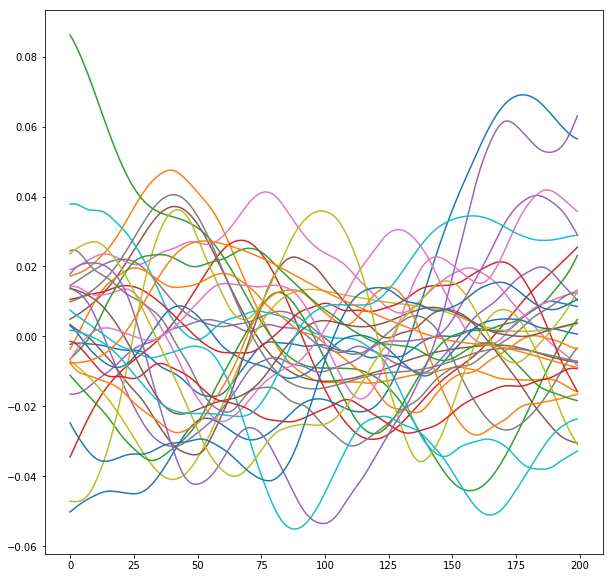

In [90]:
fig,ax = plt.subplots(1,figsize= (10,10))
for comp in np.array(comps)[:]:
    plt.plot(helper.correlation_shifted(comp,one_d["RPS_C_13_C3_left_head"], 100)[0])

In [86]:
head_corr_for_comp = []
hands_corr_for_comp = []
body_corr_for_comp = []

for comp in np.array(comps)[:]:
    hands_corr_for_comp.append((stats.linregress(comp,one_d["RPS_C_13_C3_left_hands"])[2]))
    head_corr_for_comp.append((stats.linregress(comp,one_d["RPS_C_13_C3_left_head"])[2]))
    body_corr_for_comp.append((stats.linregress(comp,one_d["RPS_C_13_C3_left_body"])[2]))

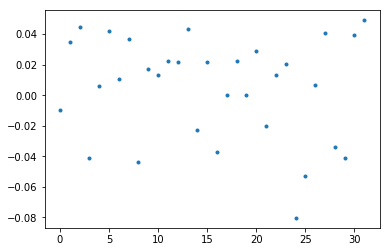

In [95]:
#plt.plot(head_corr_for_comp)
plt.plot(hands_corr_for_comp, linestyle="",marker = ".")
#plt.plot(body_corr_for_comp)

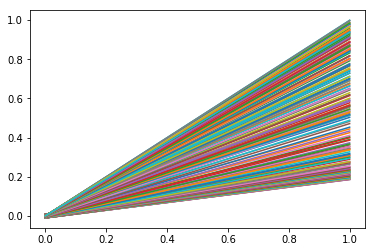

In [48]:
plt.plot(helper.correlation_shifted(comps[0],one_d["RPS_C_13_C3_left_hands"], 100))

In [46]:
comp[0]

-0.04534039249115156